In [1]:
import numpy as np
import pandas as pd

In [2]:
DATA_FILE = '../../data/label_model_output/df_train_filtered.csv'
df = pd.read_csv(DATA_FILE)

In [3]:
comments = df.Cleaned_Text.values
y = np.round(df.prob)

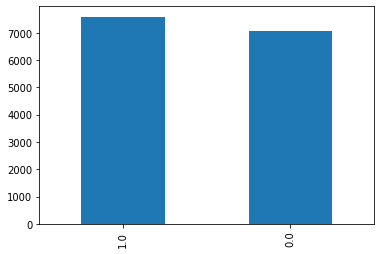

In [5]:
y.value_counts().plot(kind='bar')

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from sklearn.metrics import f1_score, make_scorer

In [13]:
random_state = 100
scorer = make_scorer(f1_score)
#preprocess_params = {}

models = {'RandomForestClassifier': RandomForestClassifier(),
         'LogisticRegression': LogisticRegression(),
         #'SVC' : SVC()
         }

model_params = {'RandomForestClassifier':
              {'n_estimators':[10],
               'max_depth': [None, 15, 20, 25, 30],
              'min_samples_split' : [2, 3],
              'min_samples_leaf': [1, 3, 5, 7],
              'min_weight_fraction_leaf': [0],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'random_state':[random_state],
              'class_weight':['balanced', None]
              },
            'LogisticRegression':{
                'penalty':['l1','l2'],
                'C':[1.e-1, 1, 1.e1]
            },
            'SVC':
              {'C':[1.e-05, 1.e-03, 1.e-01],
              'kernel':['rbf', 'linear'],
              'gamma' : ['auto', 1.e-01],
              'shrinking':[True, False],
              'class_weight':['balanced'],
              'random_state':[random_state]},
         }

In [6]:
tfidf = TfidfVectorizer(list(comments), strip_accents='unicode', decode_error= 'strict',
                        stop_words = 'english',
                       ngram_range=(1,1))

X = tfidf.fit_transform(comments)

In [7]:
def base_model(X):
    '''Returns all 1s'''
    return np.ones(X.shape[0])

In [15]:
#kfold = StratifiedKFold(n_splits=5, shuffle=False, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 21)
   
for model_name, model in models.items():
    print("**"*10, model_name, "**"*10)
    final_model = GridSearchCV(model, model_params[model_name],scoring= scorer, n_jobs= -1, cv = 5, verbose= 0)
    final_model.fit(X_train, y_train)
    
    pred_train = final_model.predict(X_train)
    pred_test = final_model.predict(X_test)
    pred_base = base_model(X_test)
    
    print('BEST ESTIMATOR')
    print(final_model.best_estimator_)
    print('BEST SCORE')
    print(final_model.best_score_)
    print('BEST_PARAMS')
    print(final_model.best_params_)
    
    print('Base f1 :', f1_score(y_test, pred_base))
    print('Train f1 :', f1_score(y_train, pred_train))
    print('Test f1 :', f1_score(y_test, pred_test))
    

******************** RandomForestClassifier ********************
BEST ESTIMATOR
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=100, verbose=0,
                       warm_start=False)
BEST SCORE
0.8542496649249196
BEST_PARAMS
{'class_weight': None, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 100}
Base f1 : 0.690096798212956
Train f1 : 0.9051504781960165
Test f1 : 0.8475442043222003
******************** LogisticRegression ********************


/Users/chitrasen/opt/anaconda3/envs/dataclass/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


BEST ESTIMATOR
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
BEST SCORE
0.9029325843380789
BEST_PARAMS
{'C': 1, 'penalty': 'l1'}
Base f1 : 0.690096798212956
Train f1 : 0.9158121964382083
Test f1 : 0.9102773246329527
